In [2]:
import sympy
sympy.init_printing()

In [3]:
z, x, y, x0, y0, dx, dy = sympy.symbols('z, x, y, x_0, y_0, \\delta_x, \\delta_y')
z, x, y

In [4]:
def Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree):
    """
    Mathematical formulation reference:
    https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Multivariable_Calculus/3%3A_Topics_in_Partial_Derivatives/Taylor__Polynomials_of_Functions_of_Two_Variables
    :param function_expression: Sympy expression of the function
    :param variable_list: list. All variables to be approximated (to be "Taylorized")
    :param evaluation_point: list. Coordinates, where the function will be expressed
    :param degree: int. Total degree of the Taylor polynomial
    :return: Returns a Sympy expression of the Taylor series up to a given degree, of a given multivariate expression, approximated as a multivariate polynomial evaluated at the evaluation_point
    """
    from sympy import factorial, Matrix, prod
    import itertools

    n_var = len(variable_list)
    point_coordinates = [(i, j) for i, j in (zip(variable_list, evaluation_point))]  # list of tuples with variables and their evaluation_point coordinates, to later perform substitution

    deriv_orders = list(itertools.product(range(degree + 1), repeat=n_var))  # list with exponentials of the partial derivatives
    deriv_orders = [deriv_orders[i] for i in range(len(deriv_orders)) if sum(deriv_orders[i]) <= degree]  # Discarding some higher-order terms
    n_terms = len(deriv_orders)
    deriv_orders_as_input = [list(sum(list(zip(variable_list, deriv_orders[i])), ())) for i in range(n_terms)]  # Individual degree of each partial derivative, of each term

    polynomial = 0
    for i in range(n_terms):
        partial_derivatives_at_point = function_expression.diff(*deriv_orders_as_input[i]).subs(point_coordinates)  # e.g. df/(dx*dy**2)
        denominator = prod([factorial(j) for j in deriv_orders[i]])  # e.g. (1! * 2!)
        distances_powered = prod([(Matrix(variable_list) - Matrix(evaluation_point))[j] ** deriv_orders[i][j] for j in range(n_var)])  # e.g. (x-x0)*(y-y0)**2
        polynomial += partial_derivatives_at_point / denominator * distances_powered
    return polynomial

In [5]:
def gaussian_curv(A, B, u, v):
    _coeff = -1 / (A * B)
    _item1 = (A.diff(v) / B).diff(v)
    _item2 = (B.diff(u) / A).diff(u)
    return _coeff * (_item1 + _item2)

In [28]:
def function(x, y):
    # return sympy.exp(x**2 + 4 * y**2) - 1
    return sympy.ln(sympy.cos(y)) - sympy.ln(sympy.cos(2*x))

In [29]:
z = function(x, y)
p0 = [0, 0]
# p0 = [x0, y0]
exp = Taylor_polynomial_sympy(z, [x, y], p0, 2)
exp

In [34]:
ds1 = function(x + dx, y) - function(x, y)
ds2 = function(x + dx, y + dy) - function(x + dx, y)
ds = function(x + dx, y + dy) - function(x, y)
ds1 = ds1 ** 2
ds2 = ds2 ** 2
ds = ds**2
# ds1, ds2, ds
# ds2
ds

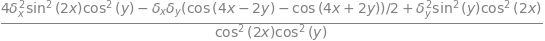

In [37]:
ds1_exp = Taylor_polynomial_sympy(ds1, [dx, dy], [0, 0], 2)
ds2_exp = Taylor_polynomial_sympy(ds2, [dx, dy], [0, 0], 2)
ds_exp = Taylor_polynomial_sympy(ds, [dx, dy], [0, 0], 2)
ds1_exp = ds1_exp.expand().simplify()
ds2_exp = ds2_exp.expand().simplify()
ds_exp = ds_exp.expand().simplify()
# ds1_exp, ds2_exp, ds_exp
ds_exp.simplify()

In [38]:
ds1_exp = ds1_exp.subs({dx:1})
ds2_exp = ds2_exp.subs({dy:1})
ds1_exp, ds2_exp

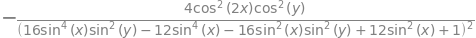

In [57]:
z
Fx = z.diff(x)
Fy = z.diff(y)
Fxx = Fx.diff(x)
Fyy = Fy.diff(y)
Fxy = Fx.diff(y)

# Fx, Fy
# Fxx, Fyy, Fxy
# (Fxx * Fyy - Fxy**2).expand().simplify()
# (1 / (1 + Fx**2 + Fy**2)**2).expand().simplify()

KK = (Fxx * Fyy - Fxy**2) / (1 + Fx**2 + Fy**2)**2
KK.expand().simplify()
# KK.subs({x:0,y:0})